In [2]:
import pandas as pd
from time import sleep
import os
import matplotlib.pyplot as plt
import numpy as np  

import math
import time
from datetime import datetime
from tqdm import tqdm

import random

import nltk
from nltk.tokenize import word_tokenize 
import string

from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
import pymorphy2

import re 

import requests
import json

from natasha import (Segmenter,MorphVocab,LOC,AddrExtractor,DatesExtractor)

In [6]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.tokenize import word_tokenize
nltk.download('punkt')

pledl = []

df = pd.read_csv(r"C:\Users\IKIT-SILA\Desktop\SGAT\Исследование Карел-Хакас\Хакас 736\2_музей5.csv")
text = df['Название']


timer = range(len(text))

for l in tqdm(timer):
    text_el = text[l]

    text_one = list(text)
    text_one = text_one[l]

    text_one = str(text_one)
    text_one = text_one.lower()
    text_one = text_one.translate(str.maketrans({'[': '', ']': '', "'": '', '—': '', ',': ''}))

    spec_chars = string.punctuation + '\n\xa0«»\t—…1234567890№' 
    text_one = "".join([ch for ch in text_one if ch not in spec_chars])

    
    tokenized_text = word_tokenize(text_one)
    tokenized_text = nltk.Text(tokenized_text)
    
    

    tokenized_text = " ".join(tokenized_text)
    tokenized_text = tokenized_text.split()
    
    

    new_new = []
    morph = pymorphy2.MorphAnalyzer()
    for word in tokenized_text:
        p = morph.normal_forms(word)[0]
        new_new.append(p)
    

    new_new = str(new_new)
    new_new = new_new.translate(str.maketrans({'[': '', ']': '', "'": '', '—': '', ',': ''}))
    
    

    words = word_tokenize(new_new)

    finder = BigramCollocationFinder.from_words(words)
    bgm = BigramAssocMeasures()
    score = bgm.pmi

    bigram_collocations = {"_".join(bigram): pmi for bigram, pmi in finder.score_ngrams(score)}
    
    pledl.append(bigram_collocations)
    
print(pledl[0:10])

[nltk_data] Downloading package punkt to C:\Users\IKIT-
[nltk_data]     SILA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:17<00:00,  9.73it/s]

[{'автореферат_культура': 3.9068905956085187, 'быт_хакас': 3.9068905956085187, 'в_совет': 3.9068905956085187, 'век_москваленинград': 3.9068905956085187, 'и_быт': 3.9068905956085187, 'исторический_связь': 3.9068905956085187, 'культура_и': 3.9068905956085187, 'москваленинград_год': 3.9068905956085187, 'народ_век': 3.9068905956085187, 'русский_народ': 3.9068905956085187, 'с_русский': 3.9068905956085187, 'связь_с': 3.9068905956085187, 'совет_исторический': 3.9068905956085187, 'хакас_в': 3.9068905956085187}, {'древний_металлургия': 3.0, 'железо_новосибирск': 3.0, 'книга_древний': 3.0, 'металлургия_хакасия': 3.0, 'новосибирск_год': 3.0, 'хакасия_эпоха': 3.0, 'эпоха_железо': 3.0}, {'адрес_президент': 4.643856189774724, 'верховный_совет': 4.643856189774724, 'вн_штыгашев': 4.643856189774724, 'год_на': 4.643856189774724, 'и_русский': 4.643856189774724, 'на_хакасский': 4.643856189774724, 'президент_глава': 4.643856189774724, 'приветственный_адрес': 4.643856189774724, 'республика_тыва': 4.64385618

In [37]:
"""
stop_words = []
    try:
        with open("stopwords.txt", encoding="utf-8") as file: stop_words = [row.strip() for row in file]
    except FileNotFoundError:
        stop_words = []

    new_new = [word for word in new_new if word not in stop_words]
"""

'\nstop_words = []\n    try:\n        with open("stopwords.txt", encoding="utf-8") as file: stop_words = [row.strip() for row in file]\n    except FileNotFoundError:\n        stop_words = []\n\n    new_new = [word for word in new_new if word not in stop_words]\n'

In [7]:
pledl_new = pledl
pledl_new = str(pledl_new)
pledl_new = pledl_new.translate(str.maketrans({'{': '','}': '',"'": '','[': '',']': '',' ': ''}))
pledl_new = pledl_new.split(',')
pledl_new = list(filter(None, pledl_new))

for i in range(len(pledl_new)):
    pledl_new[i] = pledl_new[i].split(':')

    
for i in range(len(pledl_new)):
    pledl_new[i][1] = float(pledl_new[i][1])
    pledl_new[i][1] = round(pledl_new[i][1])
    
for i in range(len(pledl_new)):
    pledl_new[i][0] = pledl_new[i][0].split('_')
    
for i in range(len(pledl_new)):
    pledl_new[i][0].sort()
    pledl_new[i][0] = str(pledl_new[i][0])
    pledl_new[i][0] = pledl_new[i][0].translate(str.maketrans({"'": '',"[": '',"]": ''," ": '',",": '_'}))
    
    
arr_col = []
    
for i in range(len(pledl_new)):
    for k in range(pledl_new[i][1]):
        arr_col.append(pledl_new[i][0])

arr_col_dict = {}.fromkeys(arr_col, 0)
for a in arr_col:
    arr_col_dict[a] += 1
arr_col_dict = {k: arr_col_dict[k] for k in sorted(arr_col_dict, key=arr_col_dict.get, reverse=True)}

print(arr_col_dict)


{'и_искусство': 110, 'и_литература': 101, 'культура_управление': 97, 'активный_участие': 95, 'областной_хакасский': 89, 'автономный_область': 85, 'областной_управление': 83, 'степень_хакасский': 83, 'активный_за': 81, 'в_участие': 81, 'автономный_хакасский': 77, 'адрес_приветственный': 76, 'асср_тувинский': 76, 'диплом_документ': 76, 'летие_с': 75, 'неделя_проведение': 73, 'литература_неделя': 67, 'в_проведение': 59, 'имя_на': 56, 'грамота_почётный': 56, 'документ_приветственный': 55, 'год_июль': 52, 'год_сентябрь': 44, 'кпсс_обком': 43, 'один_степень': 43, 'в_связь': 43, 'асср_тув': 43, 'в_хакасия': 42, 'диплом_один': 42, 'культура_на': 40, 'вручать_подарок': 40, 'герман_николай': 40, 'государственный_премия': 40, 'драмтеатр_салзанак': 40, 'государственный_лауреат': 40, 'летие_сентябрь': 40, 'максим_мунзук': 40, 'мунзук_с': 40, 'вручать_николай': 40, 'народный_поздравлять': 40, 'герман_салзанак': 40, 'драмтеатр_хакасский': 40, 'с_связь': 38, 'асср_в': 38, 'в_искусство': 38, 'в_хакасск

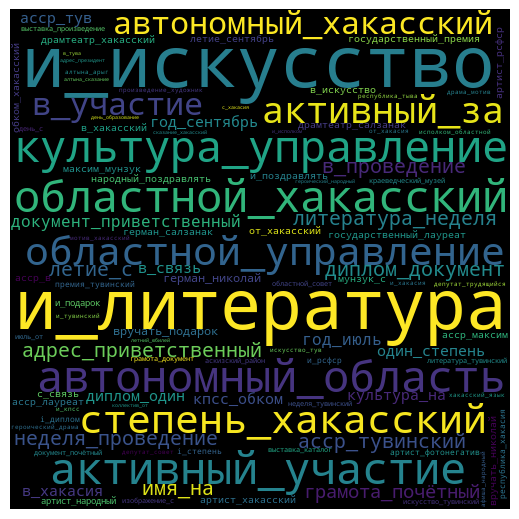

In [8]:
w = int(5)
h = int(5)

ke = list(arr_col_dict.keys())
va = list(arr_col_dict.values())

xxx = ke[0:100]
yyy = va[0:100]

new = " ".join(xxx)

cloud = WordCloud(width=100*w, height=100*h, max_words=100,contour_width=0).generate(new)
plt.figure(figsize=(w,h))
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig(r"C:\Users\IKIT-SILA\Desktop\SGAT\Исследование Карел-Хакас\Хакас 736\2_музей5.png", bbox_inches='tight')